In [1]:
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 5

In [2]:
savedRow = random_test_file(all_data)
savedRow

/Village 2/
Found file after 14 attempts.


,speaker_id,speaker_number,speaker_sex,language,language_variety,filename,segment_start,segment_end,duration,timepoint,...,CQ_PM,min_Vel,min_Vel_Time,peak_Vel,peak_Vel_Time,SQ2_SQ1,SQ4_SQ3,ratio,LPhon,SQ
5002,Bo_F3,3,F,Bo,Village 2,F3_lu_21_01,287.821,416.685,128.864,5,...,0.454,-396.526,352.877,918.914,351.234,0.256,0.761,0.142,Bo-Tense,0.336399


In [3]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)
egg = data[startSample:endSample]

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_63880/2311534566.py:1: WavFileWarning: Reached EOF prematurely; finished at 224250 bytes, expected 448420 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))
/Users/henryheyden/Documents/hp/voice_quality_honorsthesis/fpca_preprocess.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int((samplerate * targetTimepointStart) / 1000), int((samplerate * targetTimepointEnd) / 1000)


In [4]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
threshold = find_threshold(egg, peaks)

/Users/henryheyden/Documents/hp/voice_quality_honorsthesis/fpca_preprocess.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  distance = int(0.7 * samplerate / F0)


<function matplotlib.pyplot.show(close=None, block=None)>

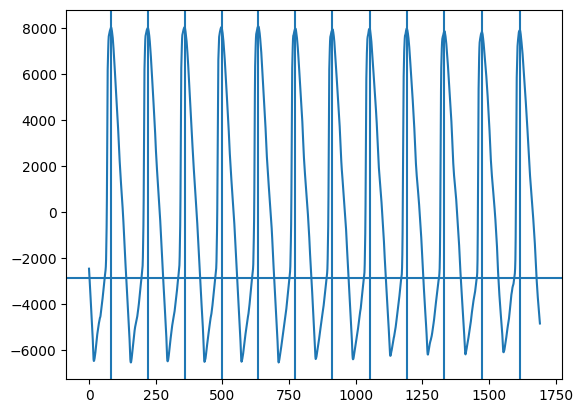

In [5]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.axhline(threshold)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

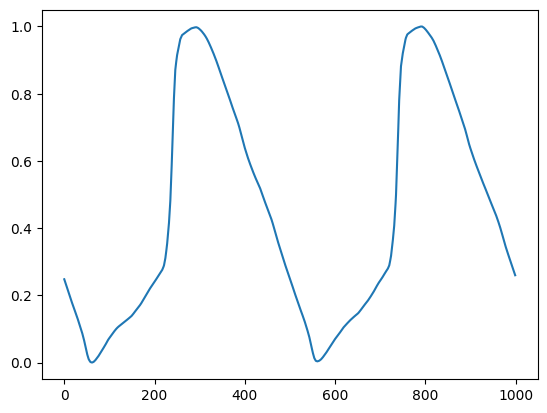

In [6]:
clipped_egg = clip_egg(egg, threshold, peaks[0])
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show